<a href="https://colab.research.google.com/github/anandsr724/ml_projects/blob/main/NN_Code_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  Neural Networks

In [ ]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten
import numpy as np
import pandas as pd


In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

In [ ]:
y_prob = model.predict(X_test)

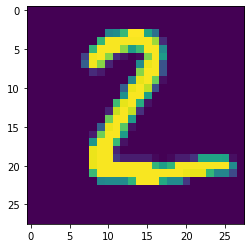

In [ ]:
plt.imshow(X_test[1])

**MNIST Digit Classification**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# show plot without plt.show
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Dropout

from sklearn.metrics import confusion_matrix
import seaborn as sns


# Data

In [ ]:
from keras.datasets import mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

In [ ]:
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualising Examples

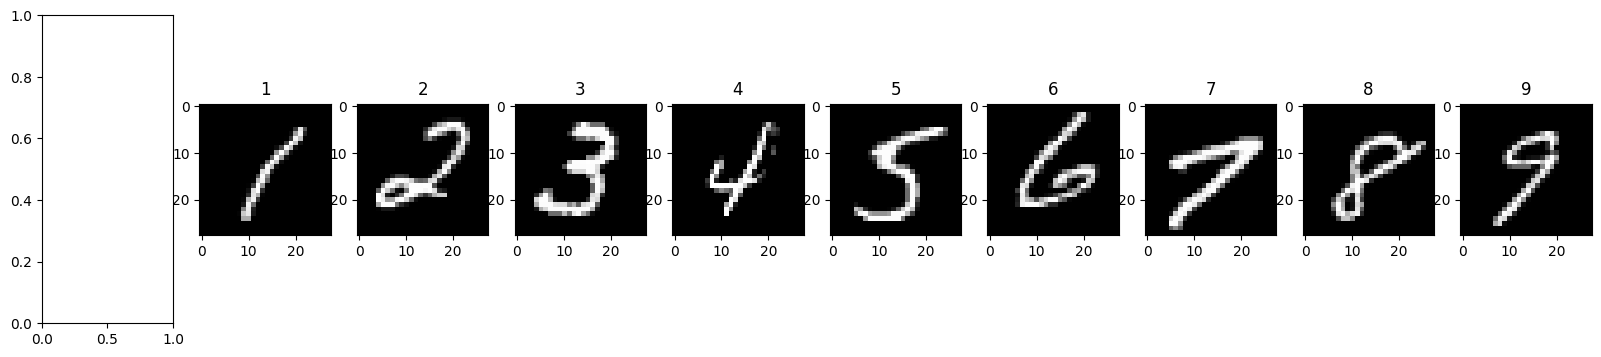

In [ ]:
num_classes =10
fig , ax =  plt.subplots(1,10,figsize=(20,4))

for i in range(1,10):
  sample = x_train[y_train==i][-1]
  ax[i].imshow(sample,cmap="gray")
  ax[i].set_title(i)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
# encodeing
import keras
y_train_enc = keras.utils.to_categorical(y_train , num_classes)
y_test_enc  = keras.utils.to_categorical(y_test  , num_classes)

# since we are doing classification

In [ ]:
y_test_enc.shape

(10000, 10)

#Prepare the Data

In [ ]:
# normalization

x_train = x_train /255
x_test = x_test /255

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# if you are not using flatten layer then do this

x_train_flatten =  x_train.reshape(x_train.shape[0], -1)   # -1 will make the 28x28 in one dimension
x_test_flatten =  x_test.reshape(x_test.shape[0], -1)   # -1 will make the 28x28 in one dimension


In [ ]:
x_train_flatten.shape

(60000, 784)

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation = 'relu'))

# model.add(Dense(units=128,input_shape=(784,), activation = 'relu'))

model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

model.summary()

'''

107

Both, categorical cross entropy and sparse categorical cross entropy have the same loss function which you have mentioned above. The only difference is the format in which you mention Yi
 (i,e true labels).

If your Yi
's are one-hot encoded, use categorical_crossentropy. Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]

But if your Yi
's are integers, use sparse_categorical_crossentropy. Examples for above 3-class classification problem: [1] , [2], [3]

The usage entirely depends on how you load your dataset. One advantage of using sparse categorical cross entropy is it saves time in memory as well as computation because it simply uses a single integer for a class, rather than a whole vector.
'''

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               100480    
                                                                 
 dense_20 (Dense)            (None, 128)               16512     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


"\n\n107\n\nBoth, categorical cross entropy and sparse categorical cross entropy have the same loss function which you have mentioned above. The only difference is the format in which you mention Yi\n (i,e true labels).\n\nIf your Yi\n's are one-hot encoded, use categorical_crossentropy. Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]\n\nBut if your Yi\n's are integers, use sparse_categorical_crossentropy. Examples for above 3-class classification problem: [1] , [2], [3]\n\nThe usage entirely depends on how you load your dataset. One advantage of using sparse categorical cross entropy is it saves time in memory as well as computation because it simply uses a single integer for a class, rather than a whole vector.\n"

# Training

In [ ]:
y_train_enc[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
print(x_train.shape , y_train.shape)

(60000, 28, 28) (60000, 10, 10)


In [ ]:
history = model.fit(x=x_train , y =y_train_enc , epochs=5 )

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2668 - accuracy: 0.9210
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1125 - accuracy: 0.9658
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0811 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0636 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0537 - accuracy: 0.9827


# Evaluate

In [ ]:
model.evaluate(x_test , y_test_enc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0835 - accuracy: 0.9750


[0.08346235752105713, 0.9750000238418579]

In [ ]:
y_prob= model.predict(x_test)
y_pred = np.argmax(y_prob,axis=1)



print(y_prob)
print("_________________")
print(y_pred)

313/313 [==============================] - 2s 5ms/step
[[6.51658449e-10 2.95873548e-07 4.41358679e-06 ... 9.99965727e-01
  5.30501598e-09 2.53078888e-05]
 [2.60938677e-13 5.68640717e-05 9.99942958e-01 ... 9.25119495e-11
  2.03233527e-10 4.53829115e-15]
 [2.62599595e-08 9.99554455e-01 3.95850730e-05 ... 1.77928578e-05
  3.11213458e-04 2.69936800e-06]
 ...
 [2.10296055e-13 1.79714316e-12 1.43979394e-11 ... 3.72219278e-09
  2.76497536e-09 6.69835956e-08]
 [9.40845058e-12 1.85990320e-11 9.25021642e-14 ... 4.87697296e-12
  1.03252914e-05 5.62473540e-11]
 [9.06083042e-10 4.20244216e-13 9.46723533e-11 ... 6.56774630e-16
  6.67399780e-09 3.08042047e-12]]
_________________
[7 2 1 ... 4 5 6]


Text(0.5, 1.0, 'True= 9 Pred= 9')

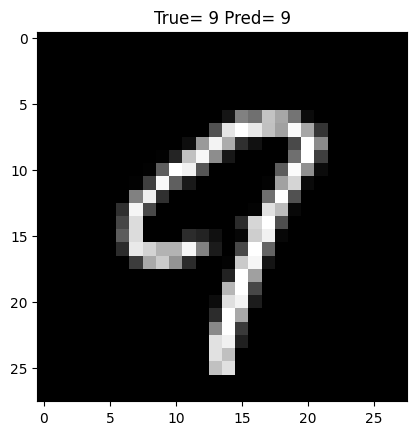

In [ ]:
random_ind = np.random.choice(len(x_test))

x_sample = x_test[random_ind]

y_true = np.argmax(y_test_enc , axis =1 )     # np.argmax returns the indices of the maximum values


plt.imshow(x_sample , cmap = 'gray')
plt.title("True= "+ str(y_test[random_ind])   + " " + "Pred= "+ str(y_pred[random_ind])   )

In [ ]:
y_true    # y true and y_test are same , use this if you want to get back from the encoding

array([7, 2, 1, ..., 4, 5, 6])

But we don't know if our model is predicting certain classes better than the other

# Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

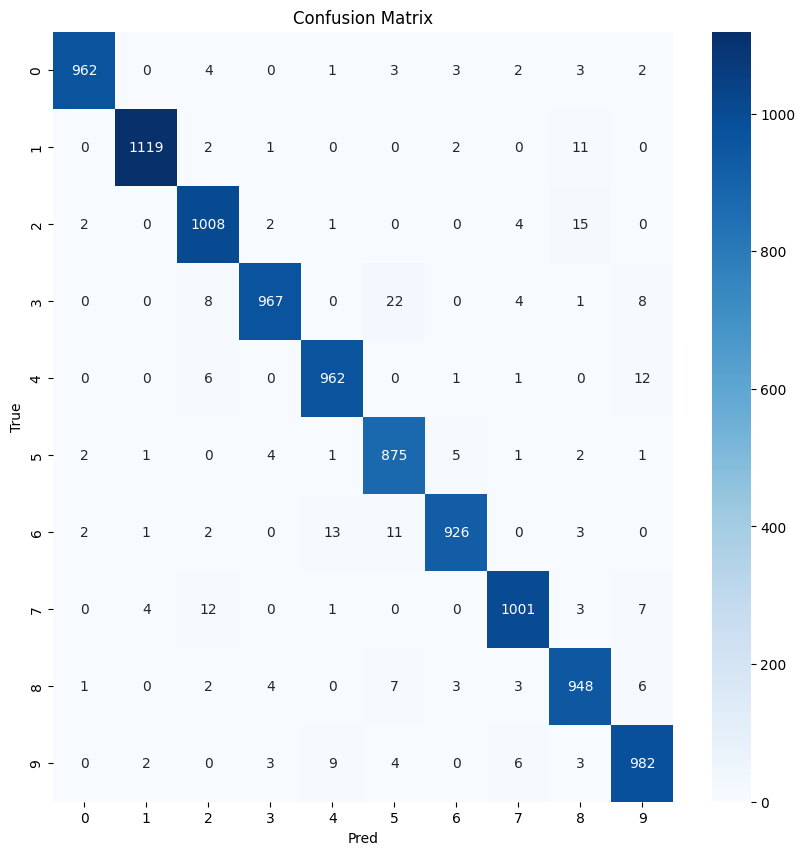

In [ ]:
confusion_mat =  confusion_matrix(y_true , y_pred)

fig , ax = plt.subplots(figsize=(10,10))

ax  = sns.heatmap(confusion_mat , annot=True , fmt ='d', cmap='Blues')
ax.set_xlabel("Pred")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")



In [ ]:
y_true

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_errors_ind = (y_pred - y_true != 0)

In [ ]:
x_errors = x_test[y_errors_ind]
y_errors_pred = y_pred[y_errors_ind]
y_errors_true = y_true[y_errors_ind]


In [ ]:
x_errors.shape

(250, 28, 28)

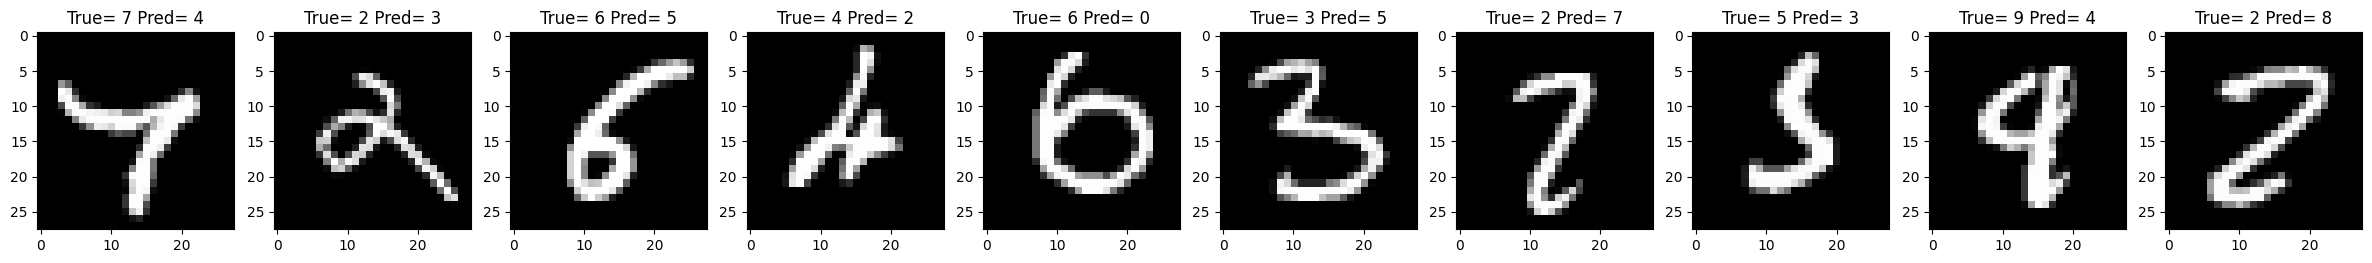

In [ ]:
num=10

fig , ax =  plt.subplots(1,num,figsize=(30,30))
for i in range(num):
  ax[i].imshow(x_errors[i],cmap='gray')
  ax[i].set_title("True= "+ str(y_errors_true[i])   + " " + "Pred= "+ str(y_errors_pred[i])   )

